In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
p1 = Path.cwd() / 'data'

In [3]:
movie = pd.read_csv(p1 / 'movie.csv', index_col='movie_title')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
mov_2_hours = movie['duration'].gt(120)
mov_2_hours.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: duration, dtype: bool

In [5]:
mov_2_hours.sum(), mov_2_hours.mean()

(1039, 0.2113506916192026)

In [6]:
movie['duration'].dropna().gt(120).mean()

0.21199755152009794

In [7]:
mov_2_hours.value_counts(normalize=True)

duration
False    0.788649
True     0.211351
Name: proportion, dtype: float64

In [8]:
criteria1 = movie.loc[:, 'imdb_score'] > 8
criteria2 = movie.loc[:, 'content_rating'] == 'PG-13'
criteria3 = (movie.loc[:, 'title_year'] < 2000) | (movie.loc[:, 'title_year'] > 2009)
criteria_final = criteria1 & criteria2 & criteria3
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [9]:
movie[criteria_final]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,2.500000e+08,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,2.200000e+08,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,2.500000e+08,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,1.700000e+08,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,1.650000e+08,2014.0,11000.0,8.6,2.35,349000
Inception,Color,Christopher Nolan,642.0,148.0,22000.0,23000.0,Tom Hardy,29000.0,292568851.0,Action|Adventure|Sci-Fi|Thriller,...,2803.0,English,USA,PG-13,1.600000e+08,2010.0,27000.0,8.8,2.35,175000
The Martian,Color,Ridley Scott,568.0,151.0,0.0,372.0,Donald Glover,13000.0,228430993.0,Adventure|Drama|Sci-Fi,...,1023.0,English,USA,PG-13,1.080000e+08,2015.0,801.0,8.1,2.35,153000
Jurassic Park,Color,Steven Spielberg,308.0,127.0,14000.0,191.0,Ariana Richards,967.0,356784000.0,Adventure|Sci-Fi|Thriller,...,895.0,English,USA,PG-13,6.300000e+07,1993.0,610.0,8.1,1.85,19000
Forrest Gump,Black and White,Robert Zemeckis,149.0,142.0,0.0,194.0,Siobhan Fallon Hogan,15000.0,329691196.0,Comedy|Drama,...,1398.0,English,USA,PG-13,5.500000e+07,1994.0,294.0,8.8,2.35,59000


In [10]:
crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = (movie.title_year < 2000) | (movie.title_year > 2009)
final_crit_a = crit_a1 & crit_a2 & crit_a3
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = (movie.title_year >= 2000) & (movie.title_year <= 2010)
final_crit_b = crit_b1 & crit_b2 & crit_b3
final_crit_all = final_crit_a | final_crit_b
final_crit_all.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [12]:
cols = ['imdb_score', 'content_rating', 'title_year']
movie_filtered = movie.loc[final_crit_all, cols]
movie_filtered

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
...,...,...,...
The Young Unknowns,4.2,R,2000.0
Bled,3.1,R,2009.0
Hoop Dreams,8.3,PG-13,1994.0


In [14]:
final_crit_all.to_numpy()

array([False, False, False, ..., False, False, False])

In [15]:
college = pd.read_csv(p1 / 'college.csv')

In [16]:
college[college['STABBR'] == 'TX'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [17]:
col2 = college.set_index('STABBR')
col2.loc['TX', :].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [20]:
states = ['TX', 'CA', 'NY']
college[college['STABBR'].isin(states)]

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
192,Academy of Art University,San Francisco,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0249,0.2523,0.2098,0.4334,1,0.4008,0.5524,0.4043,36000,35093
193,ITT Technical Institute-Rancho Cordova,Rancho Cordova,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0400,0.0000,0.1780,0.2540,0,0.7137,0.7667,0.7235,38800,25827.5
194,Academy of Chinese Culture and Health Sciences,Oakland,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
195,The Academy of Radio and TV Broadcasting,Huntington Beach,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.9579,1.0000,0.4545,28400,9500
196,Avalon School of Cosmetology-Alameda,Alameda,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0553,0.0000,0.0435,0.5099,1,0.7407,0.6768,0.3387,21600,9860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7528,WestMed College - Merced,Merced,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,15623.5
7529,Vantage College,El Paso,TX,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,9500
7530,SAE Institute of Technology San Francisco,Emeryville,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,9500
7533,Bay Area Medical Academy - San Jose Satellite ...,San Jose,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed


In [19]:
col2.loc[states, :]

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NY,Briarcliffe College–Patchogue,Patchogue,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,38200,28720.5
NY,Jamestown Business College -,Salamanca,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,12050
NY,Pratt Manhattan-A Division of Pratt Institute,New York,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,40900,26691


In [21]:
col2.index.is_monotonic_increasing

False

In [22]:
col3 = col2.sort_index()
col3.index.is_monotonic_increasing

True

In [23]:
col3.loc['TX']

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Manuel and Theresa's School of Hair Design-Vic...,Victoria,0.0,0.0,0.0,0,NaN,NaN,0.0,30.0,...,0.0000,0.0000,0.0000,0.0000,1,0.6286,0.4571,0.5652,NaN,PrivacySuppressed
TX,Criswell College,Dallas,0.0,0.0,0.0,1,NaN,NaN,0.0,253.0,...,0.0000,0.0000,0.0672,0.4506,1,0.4468,0.2298,0.5064,NaN,PrivacySuppressed
TX,Grace School of Theology,Conroe,0.0,0.0,0.0,1,NaN,NaN,0.0,41.0,...,0.0000,0.0000,0.1707,NaN,1,NaN,NaN,0.9375,NaN,PrivacySuppressed
TX,M T Training Center,Grand Prairie,0.0,0.0,0.0,0,NaN,NaN,0.0,110.0,...,0.0091,0.0000,0.0273,0.0000,1,0.3455,0.2909,0.8548,NaN,9130
TX,Southern Texas Careers Academy,McAllen,0.0,0.0,0.0,0,NaN,NaN,0.0,37.0,...,0.0000,0.0000,0.0000,0.7568,1,0.6267,0.3467,0.5143,NaN,5734.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TX,ITT Technical Institute-Arlington,Arlington,0.0,0.0,0.0,0,NaN,NaN,0.0,595.0,...,0.0151,0.0000,0.0202,0.2118,0,0.7451,0.7288,0.7435,38800,25827.5
TX,Brite Divinity School,Fort Worth,0.0,0.0,0.0,1,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,50000,22000
TX,Sanford-Brown College-San Antonio,San Antonio,0.0,0.0,0.0,0,NaN,NaN,0.0,418.0,...,0.0048,0.0000,0.4163,0.1029,1,0.7697,0.8989,0.5871,27900,27230


In [24]:
col4 = college.set_index('INSTNM')
col4.index.is_unique

True

In [25]:
college[college['INSTNM'] == 'Stanford University']

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


In [27]:
col4.loc[['Stanford University'], :]

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,7018.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


In [28]:
col5 = college.copy()
col5.index = (col5['CITY'] + ', ' + col5['STABBR'])
col5.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Normal, AL",Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
"Birmingham, AL",University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
"Montgomery, AL",Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
"Huntsville, AL",University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
"Montgomery, AL",Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [30]:
col5.loc['Miami, FL'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami, FL",Barry University,Miami,FL,0.0,0.0,0.0,1,470.0,462.0,0.0,...,0.0164,0.0741,0.0841,0.1518,1,0.5045,0.6733,0.4361,44100,28250
"Miami, FL",Carlos Albizu University-Miami,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0191,0.0305,0.5115,1,0.5850,0.7755,0.6701,29100,25000
"Miami, FL",Florida International University,Miami,FL,0.0,0.0,0.0,0,545.0,535.0,0.0,...,0.0228,0.0521,0.0092,0.3520,1,0.5642,0.4628,0.2698,43700,17250
"Miami, FL",Florida Career College-Miami,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0109,0.0002,0.0132,0.0000,1,0.7490,0.6755,0.6511,30100,9500
"Miami, FL",George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0046,0.0000,0.0000,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


In [31]:
emp = pd.read_csv(p1 / 'employee.csv')
emp.dtypes

UNIQUE_ID              int64
POSITION_TITLE        object
DEPARTMENT            object
BASE_SALARY          float64
RACE                  object
EMPLOYMENT_TYPE       object
GENDER                object
EMPLOYMENT_STATUS     object
HIRE_DATE             object
JOB_DATE              object
dtype: object

In [32]:
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
select = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']

In [34]:
(emp
 .query("DEPARTMENT in @depts and GENDER == 'Female' and 80000 <= BASE_SALARY <= 120000")
 .loc[:, select]
)

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0
564,564,Houston Police Department-HPD,Female,81239.0
595,595,Houston Police Department-HPD,Female,99953.0
937,937,Houston Police Department-HPD,Female,81239.0
954,954,Houston Police Department-HPD,Female,91181.0
1118,1118,Houston Police Department-HPD,Female,104455.0


In [35]:
crit_dept = emp['DEPARTMENT'].isin(depts)
crit_gender = emp['GENDER'].eq('Female')
crit_sal = emp['BASE_SALARY'].between(80_000, 120_000, inclusive='both')
crit_final = crit_dept & crit_gender & crit_sal
emp.loc[crit_final, select]

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0
564,564,Houston Police Department-HPD,Female,81239.0
595,595,Houston Police Department-HPD,Female,99953.0
937,937,Houston Police Department-HPD,Female,81239.0
954,954,Houston Police Department-HPD,Female,91181.0
1118,1118,Houston Police Department-HPD,Female,104455.0


In [36]:
top_5_depts = emp['DEPARTMENT'].value_counts().index[:5]
criteria = ~emp['DEPARTMENT'].isin(top_5_depts)
emp.loc[criteria, select]

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
0,0,Municipal Courts Department,Female,121862.0
1,1,Library,Female,26125.0
4,4,General Services Department,Male,56347.0
18,18,General Services Department,Male,40581.0
32,32,Finance,Male,46963.0
...,...,...,...,...
1976,1976,Solid Waste Management,Female,34466.0
1983,1983,Admn. & Regulatory Affairs,Female,55172.0
1985,1985,Fleet Management Department,Male,30222.0
1988,1988,Legal Department,Male,124115.0


In [38]:
criteria = emp['DEPARTMENT'].isin(top_5_depts)
emp.loc[~criteria, select]

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
0,0,Municipal Courts Department,Female,121862.0
1,1,Library,Female,26125.0
4,4,General Services Department,Male,56347.0
18,18,General Services Department,Male,40581.0
32,32,Finance,Male,46963.0
...,...,...,...,...
1976,1976,Solid Waste Management,Female,34466.0
1983,1983,Admn. & Regulatory Affairs,Female,55172.0
1985,1985,Fleet Management Department,Male,30222.0
1988,1988,Legal Department,Male,124115.0


In [40]:
(emp
 .query("DEPARTMENT not in @top_5_depts")
 .loc[:, select]
)

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
0,0,Municipal Courts Department,Female,121862.0
1,1,Library,Female,26125.0
4,4,General Services Department,Male,56347.0
18,18,General Services Department,Male,40581.0
32,32,Finance,Male,46963.0
...,...,...,...,...
1976,1976,Solid Waste Management,Female,34466.0
1983,1983,Admn. & Regulatory Affairs,Female,55172.0
1985,1985,Fleet Management Department,Male,30222.0
1988,1988,Legal Department,Male,124115.0


In [41]:
fb_likes = movie['actor_1_facebook_likes'].dropna()
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [42]:
fb_likes.describe()

count      4909.000000
mean       6494.488491
std       15106.986884
min           0.000000
25%         607.000000
50%         982.000000
75%       11000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

In [47]:
crit_high = fb_likes < 20000
crit_low = fb_likes > 300
crit_high.mean()

0.9085353432470972

In [49]:
fb_likes.where(crit_high, other=20000).where(crit_low, other=300).equals(fb_likes.clip(lower=300, upper=20000))

True

<AxesSubplot:>

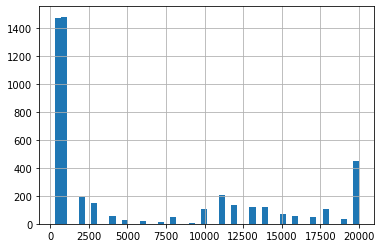

In [51]:
fb_likes.clip(lower=300, upper=20000).hist(bins=50)

In [53]:
fb_likes.mask(crit_high).equals(fb_likes.where(~crit_high))

True

In [54]:
cols = ['content_rating', 'imdb_score', 'title_year', 'gross']
c1 = movie.loc[:, 'content_rating'].eq('G')
c2 = movie.loc[:, 'imdb_score'].lt(4)
criteria = c1 & c2

In [55]:
movie.loc[criteria, cols]

,content_rating,imdb_score,title_year,gross
movie_title,,,,
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN


In [58]:
movie.loc[:, cols].select_dtypes('number')

,imdb_score,title_year,gross
movie_title,,,
Avatar,7.9,2009.0,760505847.0
Pirates of the Caribbean: At World's End,7.1,2007.0,309404152.0
Spectre,6.8,2015.0,200074175.0
The Dark Knight Rises,8.5,2012.0,448130642.0
Star Wars: Episode VII - The Force Awakens,7.1,NaN,NaN
...,...,...,...
Signed Sealed Delivered,7.7,2013.0,NaN
The Following,7.5,NaN,NaN
A Plague So Pleasant,6.3,2013.0,NaN


In [59]:
col_index = [movie.columns.get_loc(col) for col in cols]
col_index

[20, 24, 22, 8]

In [61]:
movie.iloc[criteria.to_numpy(), col_index].equals(movie.loc[criteria, cols])

True